In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Customer data/BankCustomerData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42639 non-null  int64 
 1   job        42639 non-null  object
 2   marital    42639 non-null  object
 3   education  42639 non-null  object
 4   default    42639 non-null  object
 5   balance    42639 non-null  int64 
 6   housing    42639 non-null  object
 7   loan       42639 non-null  object
 8   contact    42639 non-null  object
 9   day        42639 non-null  int64 
 10  month      42639 non-null  object
 11  duration   42639 non-null  int64 
 12  campaign   42639 non-null  int64 
 13  pdays      42639 non-null  int64 
 14  previous   42639 non-null  int64 
 15  poutcome   42639 non-null  object
 16  Customer   42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [ ]:
data.shape

(42639, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = data.copy()

In [ ]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,42639.000000,42639.000000,42639.000000
mean,34.169141,2.816412,0.465442
std,92.041713,3.163564,2.166705
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,536.000000,63.000000,275.000000


Text(0.5, 1.0, 'Education type vs Count')

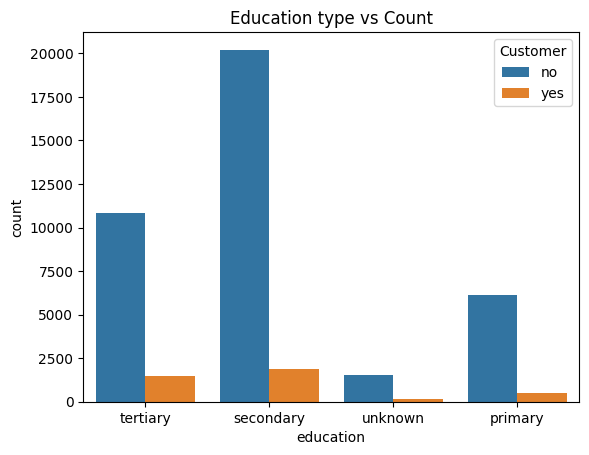

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

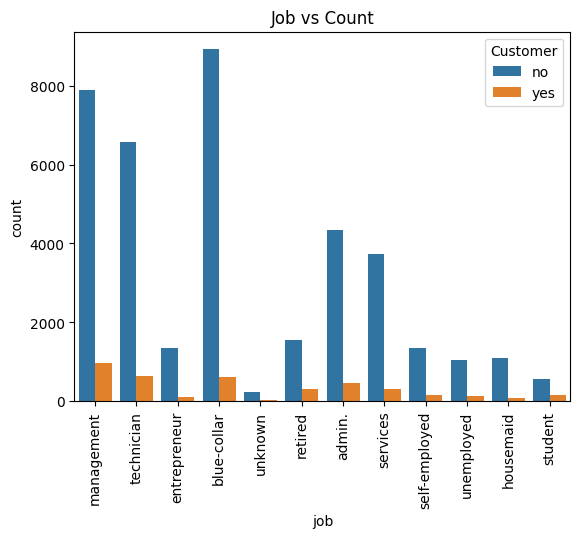

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

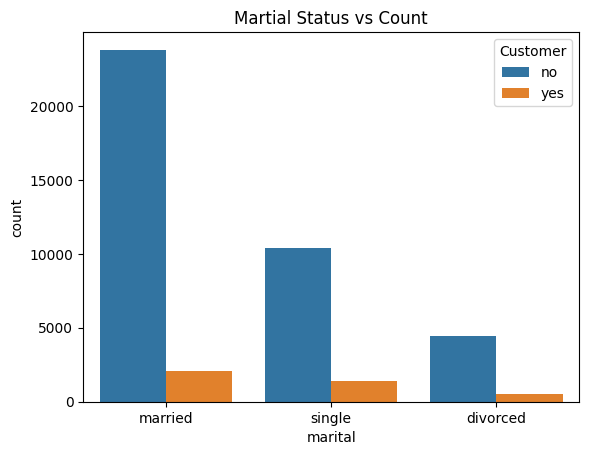

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

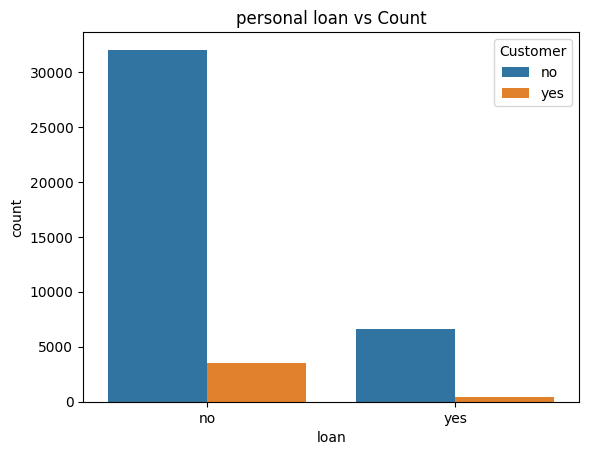

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

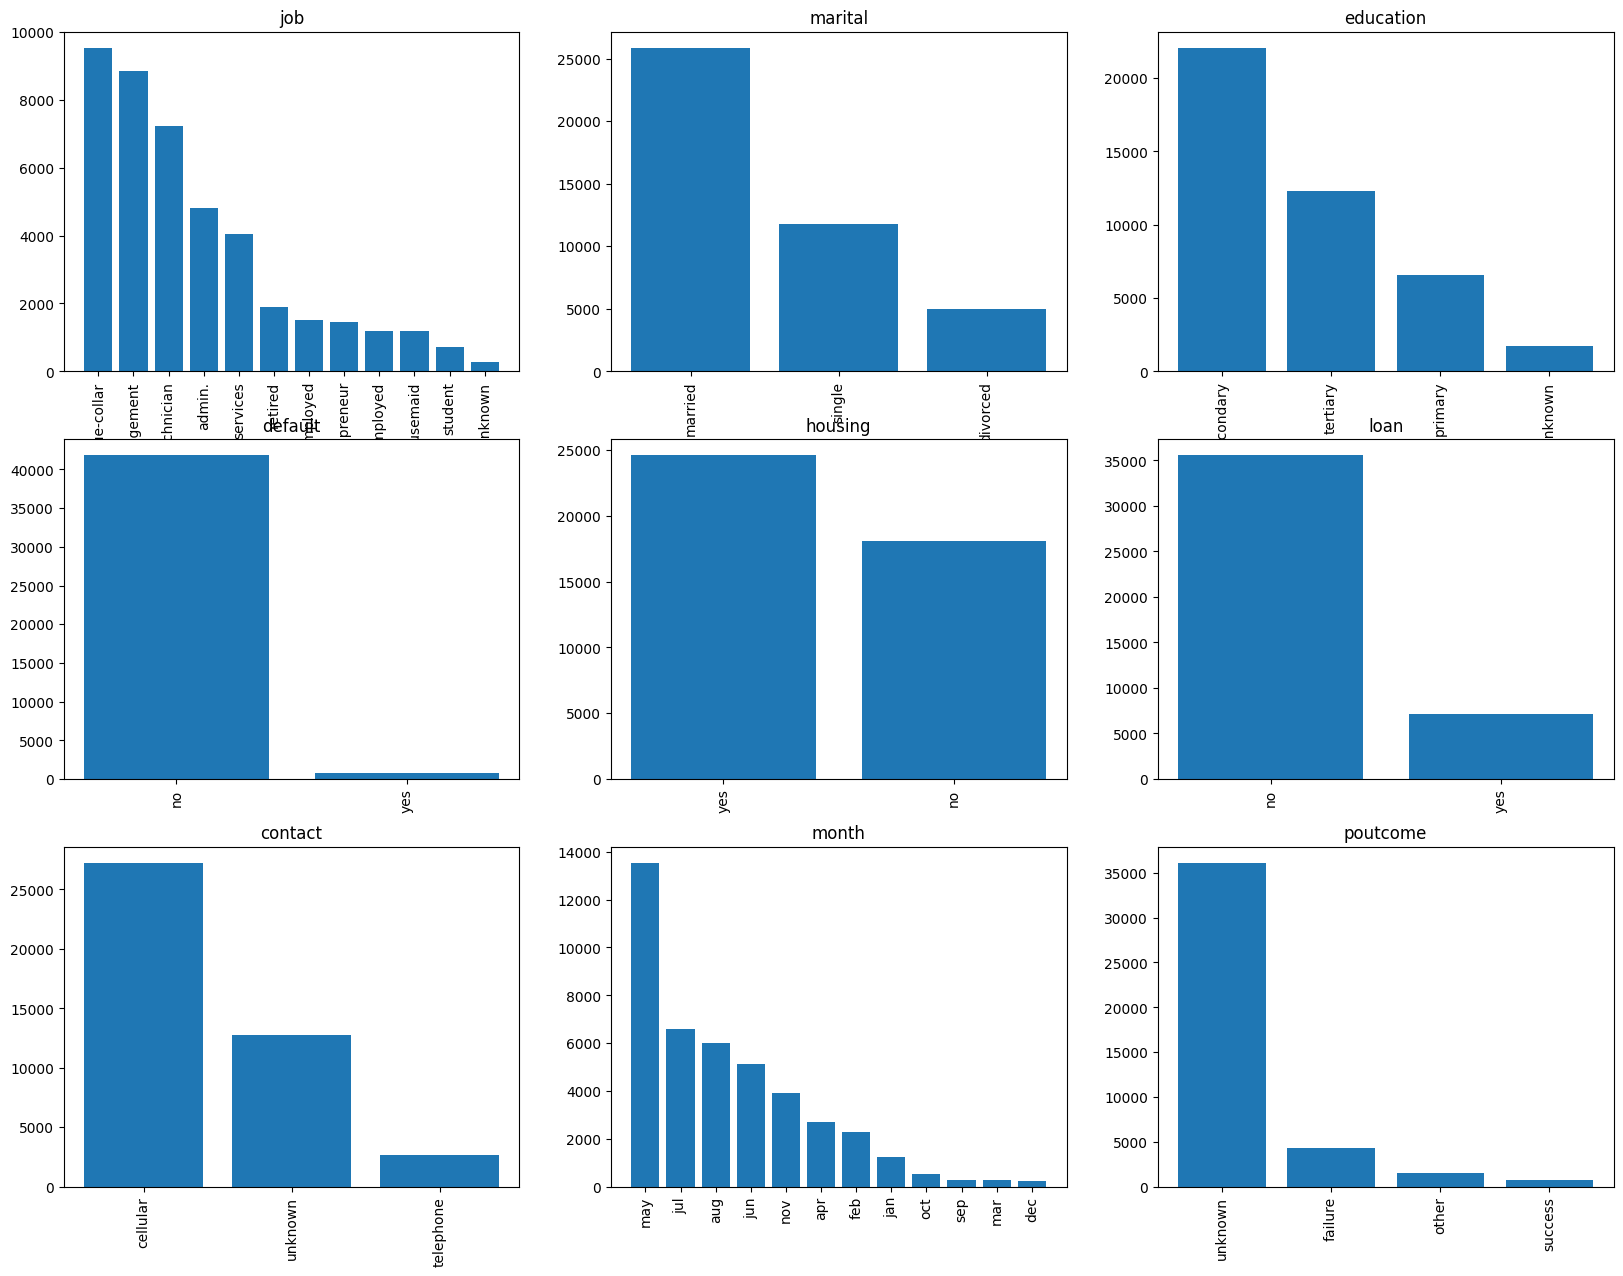

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

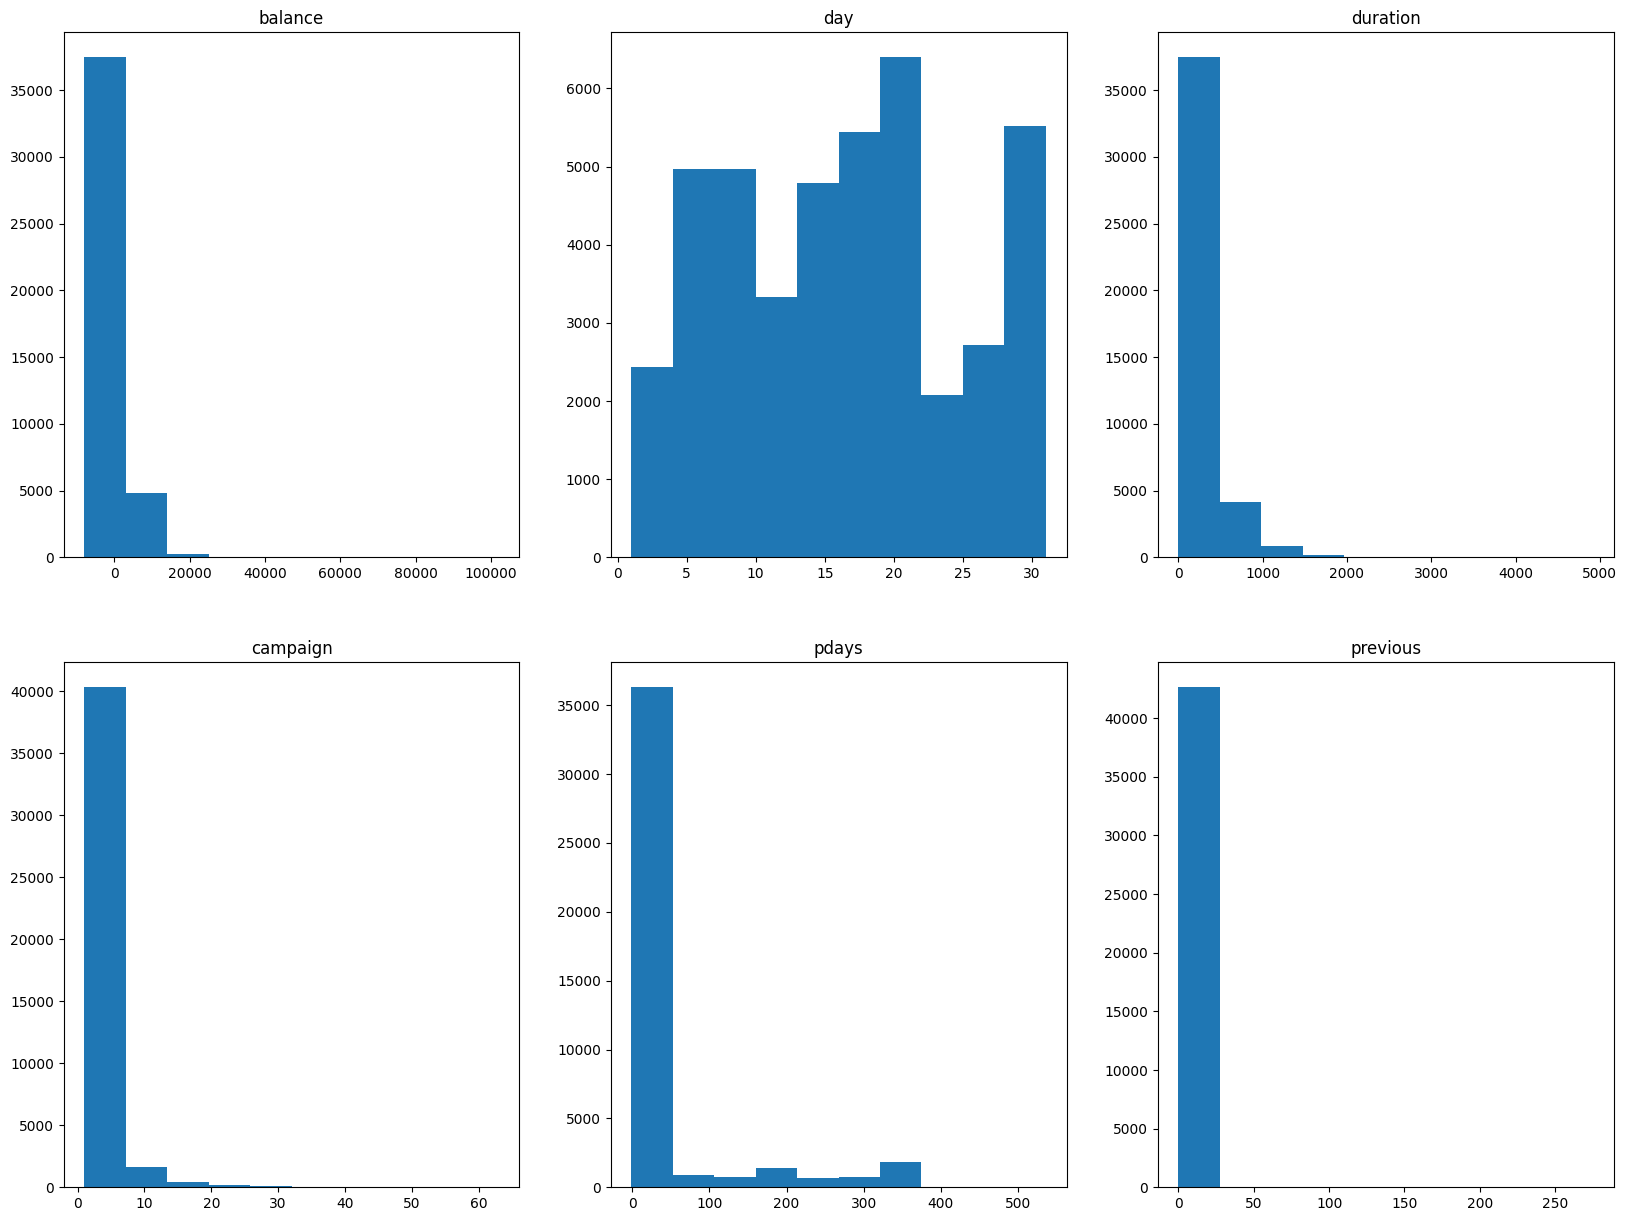

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

<Axes: >

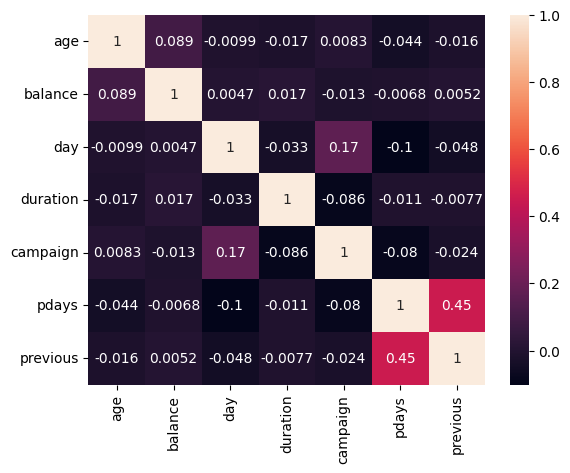

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-147-41d6514d9479>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


,age,balance,day,duration,campaign,pdays,previous
age,NaN,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,NaN,NaN,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,NaN,NaN,NaN,-0.032557,0.165906,-0.101391,-0.048445
duration,NaN,NaN,NaN,NaN,-0.085640,-0.010812,-0.007730
campaign,NaN,NaN,NaN,NaN,NaN,-0.079981,-0.024374
pdays,NaN,NaN,NaN,NaN,NaN,NaN,0.450869
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.01)]
to_drop

['day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
target = df['Customer']
features = df.drop(to_drop, axis=1)
features = features.drop('Customer',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  42639 non-null  int64
 1   balance              42639 non-null  int64
 2   job_blue-collar      42639 non-null  uint8
 3   job_entrepreneur     42639 non-null  uint8
 4   job_housemaid        42639 non-null  uint8
 5   job_management       42639 non-null  uint8
 6   job_retired          42639 non-null  uint8
 7   job_self-employed    42639 non-null  uint8
 8   job_services         42639 non-null  uint8
 9   job_student          42639 non-null  uint8
 10  job_technician       42639 non-null  uint8
 11  job_unemployed       42639 non-null  uint8
 12  job_unknown          42639 non-null  uint8
 13  marital_married      42639 non-null  uint8
 14  marital_single       42639 non-null  uint8
 15  education_secondary  42639 non-null  uint8
 16  education_tertiary   4

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense, Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [ ]:

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features

array([[0.51948052, 0.09225936, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.07306666, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.07282153, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20779221, 0.13379514, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05194805, 0.0751094 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.18181818, 0.09061609, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,target,stratify=target, test_size=0.2)

In [ ]:
X_train.shape,y_train.shape

((34111, 37), (34111,))

In [ ]:
X_test.shape,y_test.shape

((8528, 37), (8528,))

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=27)
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)

print("Before OverSampling class distribution: - ",Counter((y_train)))
print("After OverSampling class distribution: - ",Counter((y_train_smote)))

Before OverSampling class distribution: -  Counter({0: 30942, 1: 3169})
After OverSampling class distribution: -  Counter({0: 30942, 1: 30942})


In [ ]:
X_train_2d=np.expand_dims(X_train_smote,axis=2)
n_timesteps,n_features=X_train_2d.shape[1],X_train_2d.shape[2]
model=Sequential()
model.add(Conv1D(filters=64,kernel_size=2,activation="relu",input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 36, 64)            192       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 18, 64)           0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 1152)              0         
                                                                 
 dense_16 (Dense)            (None, 20)                23060     
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 23,273
Trainable params: 23,273
Non-trainable params: 0
__________________________________________________

In [ ]:

from tensorflow import keras

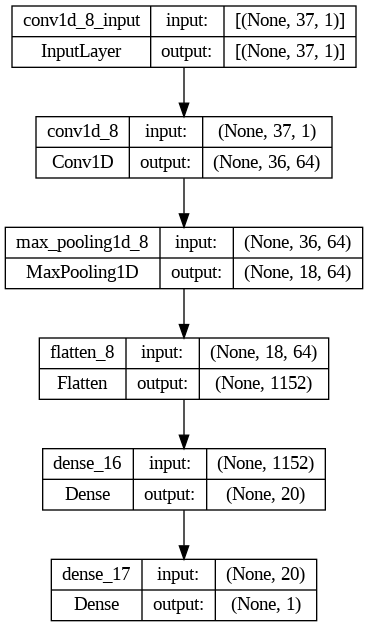

In [ ]:
keras.utils.plot_model(model,to_file='cnn.png',show_shapes=True)

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_2d, y_train_smote,validation_split=0.2,epochs=50,batch_size=500)

Epoch 1/50
100/100 [==============================] - 5s 40ms/step - loss: 0.5967 - accuracy: 0.6876 - val_loss: 0.7921 - val_accuracy: 0.4659
Epoch 2/50
100/100 [==============================] - 2s 24ms/step - loss: 0.5611 - accuracy: 0.7257 - val_loss: 0.7894 - val_accuracy: 0.4680
Epoch 3/50
100/100 [==============================] - 2s 21ms/step - loss: 0.5554 - accuracy: 0.7280 - val_loss: 0.8254 - val_accuracy: 0.4272
Epoch 4/50
100/100 [==============================] - 2s 22ms/step - loss: 0.5502 - accuracy: 0.7301 - val_loss: 0.8992 - val_accuracy: 0.3945
Epoch 5/50
100/100 [==============================] - 2s 23ms/step - loss: 0.5465 - accuracy: 0.7315 - val_loss: 0.7301 - val_accuracy: 0.4892
Epoch 6/50
100/100 [==============================] - 3s 27ms/step - loss: 0.5413 - accuracy: 0.7353 - val_loss: 0.7146 - val_accuracy: 0.5103
Epoch 7/50
100/100 [==============================] - 4s 37ms/step - loss: 0.5356 - accuracy: 0.7379 - val_loss: 0.8897 - val_accuracy: 0.4015

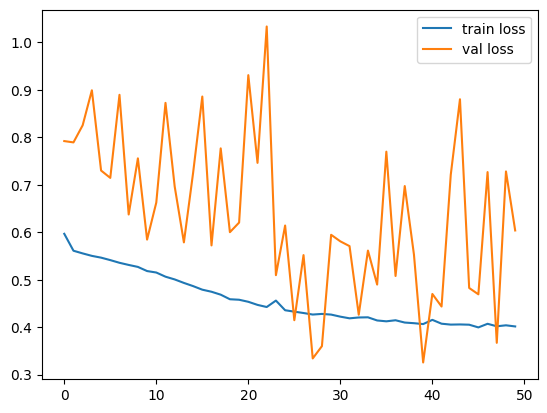

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

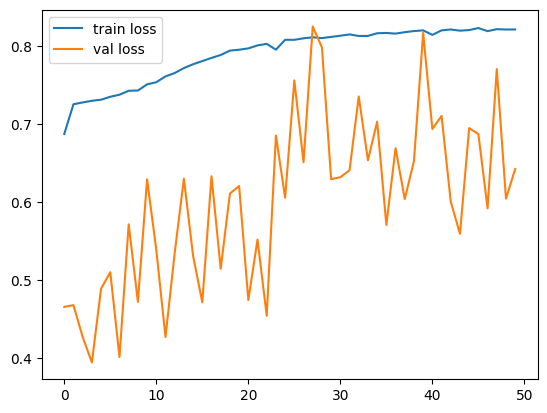

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train loss')
plt.plot(history.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
y_pred = model.predict(np.expand_dims(X_test,axis=2))
print("CNN Accuracy: ",accuracy_score(y_test, y_pred.round()))

267/267 [==============================] - 1s 2ms/step
CNN Accuracy:  0.8928236397748592
